### Module 5 - Data Analysis



This assignment aims to put together our work from module 3.  You are to explore a dataset dealing with customer churn.  Exploratory plots and split-apply-combine techniques will be the main focus of the investigation with the impetus being to identify drivers of customer churn. Churn determines if a customer eliminated their subscription to the telecommunication company. 

#### Index:

- [Problem 1](#Problem-1:-Reading-in-the-Data)
- [Problem 2](#Problem-2:-Exploring-the-Missing-Data)
- [Problem 3](#Problem-3:-Investigating-Churn)
- [Problem 4](#Problem-4:-Plotting-Churn-with-Seaborn)
- [Problem 5](#Problem-5:-Churn-Across-all-Customers)
- [Problem 6](#Problem-1:-Churn-by-International-Plan)
- [Problem 7](#Problem-2:-Selecting-Specific-States)
- [Problem 8](#Problem-3:-International-Minutes-and-Churn)
- [Problem 9](#Problem-4:-pairplot-of-features)
- [Problem 10](#Problem-5:-Customer-Service-Calls-and-Churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

[Back to top](#Index:) 


### Problem 1: Reading in the Data

Read in the dataset as a pandas DataFrame and assign your answer to `coupons_df` below.  The dataset is located in the `data` folder and titled `in-vehicle-coupon-recommendation.csv`.

In [2]:
coupons_df = None
coupons_df = pd.read_csv('/Users/nareshkatta/Downloads/in-vehicle-coupon-recommendation.csv')

print(type(coupons_df))
coupons_df.head()

<class 'pandas.core.frame.DataFrame'>


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
coupons_df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

[Back to top](#Index:) 


 Exploring the Data


In [5]:
missing_vals = None

missing_vals = coupons_df.isnull().sum()


# Answer check
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

[Back to top](#Index:) 


### Problem 3: Investigating Churn

**1 Point**

Use the `.value_counts()` method on the `churn` column of `churn_df` to determine the *percent* (value between 0 and 1) of customers churned and not in the dataset.  Assign your results as a pandas Series to `churn_pct` below.  

In [12]:
import plotly.express as px
px.box(data_frame=coupons_df, x = 'age', color = 'coupon')


In [7]:
### BEGIN HIDDEN TESTS
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
churn_pct_ = churn_df_['churn'].value_counts(normalize = True)
#
#
#
assert type(churn_pct) == type(churn_pct_)
pd.testing.assert_series_equal(churn_pct, churn_pct_)
### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 4: Plotting Churn with Seaborn

**1 Point**

Use seaborn's `countplot()` on the `churn` column of `churn_df` to visualize the counts of customers churned and not churned.  Save your image as `churn_count.png` to the `images` folder.

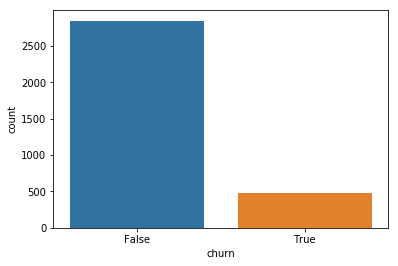

In [8]:
### GRADED

### BEGIN SOLUTION
sns.countplot(data = churn_df, x = 'churn')
plt.savefig('images/churn_count.png')
### END SOLUTION

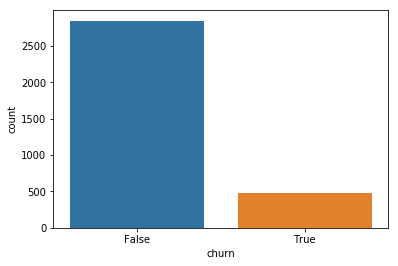

In [9]:
### BEGIN HIDDEN TESTS
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
sns.countplot(data = churn_df_, x = 'churn')
plt.savefig('images/churn_count_.png')
### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 5: Churn Across all Customers

**1 Point**

Based on what you see in problem 3 and 4, are most customers churned or do most stay with the company?  Assign a boolean of `True` if most are churned and `False` if most stay with the company to the variable `most_churn` below.

In [10]:
### GRADED

most_churn = None

### BEGIN SOLUTION
most_churn = False
### END SOLUTION
print(type(most_churn))
most_churn

<class 'bool'>


False

In [11]:
### BEGIN HIDDEN TESTS
most_churn_ = False
#
#
#
assert most_churn_ == most_churn
### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 6: Churn by International Plan

**1 Point**

Use the `groupby` method to split the data based on customers who did and did not have international plans.  Find the average churn for each group and assign your response as a DataFrame to `intl_churn` below.  

In [12]:
### GRADED

intl_churn = None

### BEGIN SOLUTION
intl_churn = churn_df.groupby('intl_plan')[['churn']].mean()
### END SOLUTION
print(type(intl_churn))
intl_churn

<class 'pandas.core.frame.DataFrame'>


,churn
intl_plan,
no,0.114950
yes,0.424149


In [13]:
### BEGIN HIDDEN TESTS
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
intl_churn_ = churn_df_.groupby('intl_plan')[['churn']].mean()
#
#
#
assert type(intl_churn) == type(intl_churn_)
pd.testing.assert_frame_equal(intl_churn, intl_churn_)
### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 7: Selecting Specific States

**1 Point**

Subset the data to the following five states using the `query` method.  Use the resulting subset to determine the percent churned for each state using the `groupby` method.  Which state had the highest churn rate?  Assign your answer as a string with the two letter abbreviation from the list `states` to `most_churn_ne` below.

```python
states = ['NY', 'MA', 'CT', 'NH', 'ME']
```

In [14]:
states = ['NY', 'MA', 'CT', 'NH', 'ME']

In [15]:
### explore the data here


In [16]:
### GRADED

most_churn_ne = None

### BEGIN SOLUTION
ne = churn_df.query('state in @states')
ans = ne.groupby('state')[['churn']].mean().sort_values(by = 'churn', ascending = False)
most_churn_ne = 'ME'
### END SOLUTION
print(type(most_churn_ne))
most_churn_ne

<class 'str'>


'ME'

In [17]:
### BEGIN HIDDEN TESTS
states_ = ['NY', 'MA', 'CT', 'NH', 'ME']
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
ne_ = churn_df_.query('state in @states_')
ans_ = ne_.groupby('state')[['churn']].mean().sort_values(by = 'churn', ascending = False)
most_churn_ne_ = 'ME'
#
#
#
assert type(most_churn_ne) == type(most_churn_ne_)
assert most_churn_ne == most_churn_ne_, 'Make sure your string matches the name in the list exactly'
### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 8: International Minutes and Churn

**1 Point**

Use seaborn to create histograms of the `intl_mins` column split by churn.  Save your plot as `intl_mins.png` to the `images` folder.  Do you think international minutes determine customer churn?  Assign you answer as a string -- `yes` or `no` -- to `intl_min_churn` below.

<class 'str'>


'no'

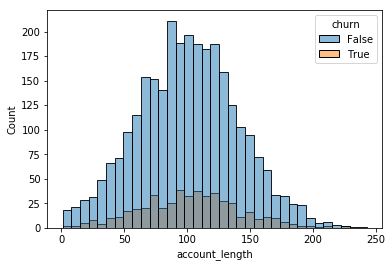

In [18]:
### GRADED
#make your histogram

intl_min_churn = None

### BEGIN SOLUTION
intl_min_churn = 'no'
sns.histplot(data = churn_df, x = 'account_length', hue = 'churn')
plt.savefig('images/intl_mins.png')
### END SOLUTION
print(type(intl_min_churn))
intl_min_churn

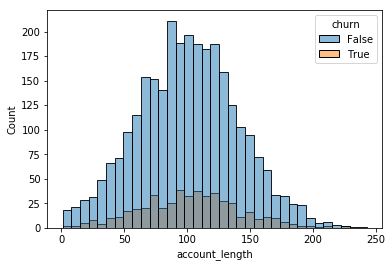

In [19]:
### BEGIN HIDDEN TESTS
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
sns.histplot(data = churn_df_, x = 'account_length', hue = 'churn')
plt.savefig('images/intl_mins_.png')
intl_min_churn_ = 'no'
#
#
#
assert type(intl_min_churn) == type(intl_min_churn_)
assert intl_min_churn == intl_min_churn_, 'Make sure your string matches yes or no exactly'
### END HIDDEN TESTS


[Back to top](#Index:) 


### Problem 9: `pairplot` of features

**1 Point**

Use the columns `[night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls]` to produce a seaborn `jointplot` colored by `churn`.  Save your image to `jointplot.png` in the images folder.  Do any of the features seem to separate customers who were churned from those that were not?

In [ ]:
### GRADED

#make your pairplot

### BEGIN SOLUTION
sns.pairplot(churn_df[['night_calls', 'night_charge', 'intl_mins', 
                       'intl_calls', 'intl_charge', 'custserv_calls', 'churn']], hue = 'churn')
plt.savefig('images/intl_mins.png')
### END SOLUTION

In [ ]:
### BEGIN HIDDEN TESTS
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
sns.pairplot(churn_df_[['night_calls', 'night_charge', 'intl_mins', 
                       'intl_calls', 'intl_charge', 'custserv_calls', 'churn']], hue = 'churn')
plt.savefig('images/intl_mins_.png')

#
#
#

### END HIDDEN TESTS

[Back to top](#Index:) 


### Problem 10: Customer Service Calls and Churn

**1 Point**

Use the `groupby` method to split the data by customers who had more than 4 customer service calls and those that had fewer.  Determine the churn rate for each of the groups and assign your result as a DataFrame to `cust_service_churn` below.

In [ ]:
### GRADED

cust_service_churn = None

### BEGIN SOLUTION
cust_service_churn = churn_df.groupby(churn_df['custserv_calls'] > 4)[['churn']].mean()
### END SOLUTION
print(type(cust_service_churn))
cust_service_churn

In [ ]:
### BEGIN HIDDEN TESTS
churn_df_ = pd.read_csv('data/cell_phone_churn.csv')
cust_service_churn_ = churn_df_.groupby(churn_df['custserv_calls'] > 4)[['churn']].mean()

#
#
#
assert type(cust_service_churn) == type(cust_service_churn_)
pd.testing.assert_frame_equal(cust_service_churn, cust_service_churn_)
### END HIDDEN TESTS

It seems there are certain criteria where we find a larger percentage of customers churned based on this initial investigation.  Of course, there are many other ways to split, filter, and aggregate the data.  You are encouraged to further slice and dice the data to dig for more clues as to what drives customer churn.